# Hiyerarşik Kümeleme

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import dendrogram, linkage

## Veri setinin oku

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv')

In [7]:
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,36.7,19.3,193.0,3450.0
4,Adelie,39.3,20.6,190.0,3650.0


In [8]:
# 75 tane rasgele veri seçelim
df = df.sample(n=75, random_state=1)

In [9]:
df.head()

,y,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
102,Adelie,37.8,20.0,190.0,4250.0
125,Adelie,38.8,17.6,191.0,3275.0
11,Adelie,41.1,17.6,182.0,3200.0
248,Gentoo,46.9,14.6,222.0,4875.0
238,Gentoo,51.3,14.2,218.0,5300.0


In [10]:
y = df.y # penguen türü

In [11]:
df = df.drop('y', axis=1) # y kolonunu drop edelim

In [12]:
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
102,37.8,20.0,190.0,4250.0
125,38.8,17.6,191.0,3275.0
11,41.1,17.6,182.0,3200.0
248,46.9,14.6,222.0,4875.0
238,51.3,14.2,218.0,5300.0
...,...,...,...,...
73,35.5,17.5,190.0,3700.0
287,52.0,18.1,201.0,4050.0
304,40.9,16.6,187.0,3200.0
165,45.8,14.6,210.0,4200.0


## Scipy ile kümeleme

In [16]:
hc = linkage(df, method='ward', metric='euclidean') # linkage komutu ile, 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

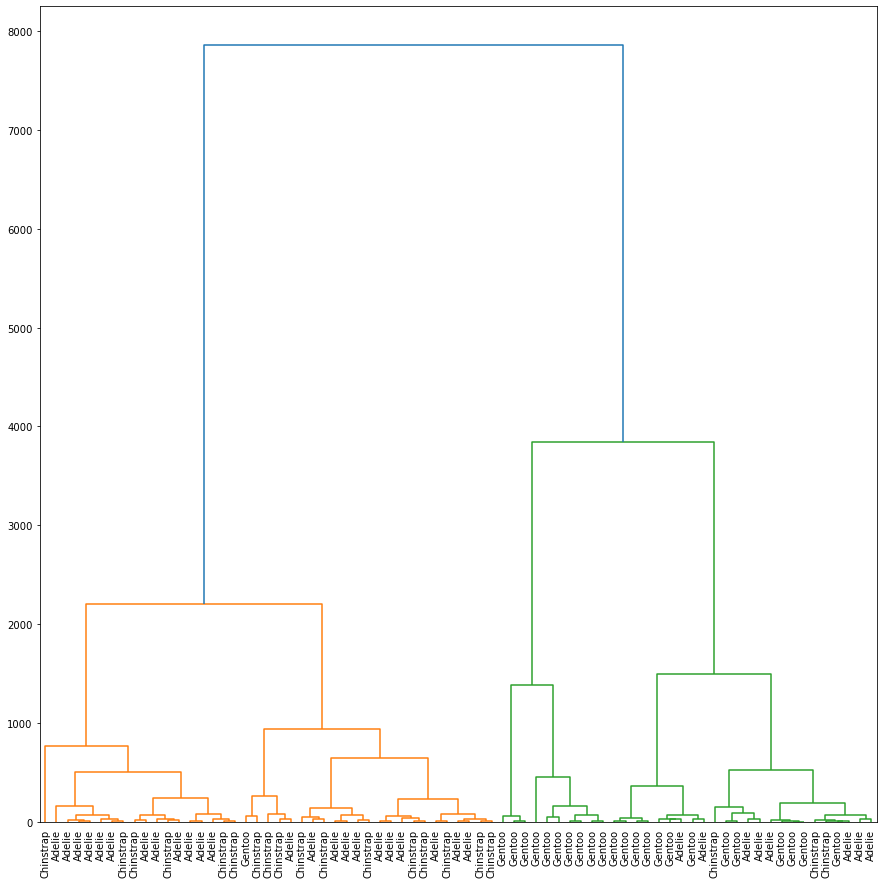

In [18]:
fig = plt.figure(figsize=(15,15))
dn = dendrogram(hc, leaf_label_func=lambda id: y.values[id], leaf_font_size=10)

## sklearn 

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

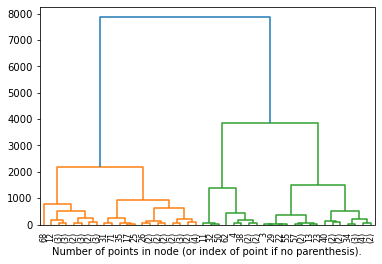

In [33]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df)
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# K-means (k-ortalama) kümelemesi

In [34]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv')
y = df.y
df = df.drop('y',axis=1)

In [36]:
df_org = df.copy()

In [37]:
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [38]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


In [39]:
df_org.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [40]:
y.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

### Scree plot
https://www.statology.org/scree-plot-python/

In [41]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=4)

In [52]:
pca_fit = pca.fit(df)

In [45]:
import numpy as np

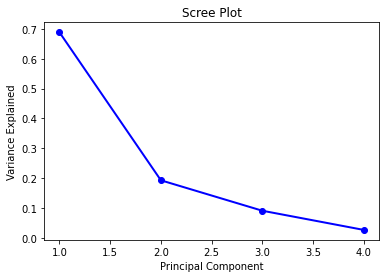

In [53]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [54]:
# kMeans object
km = KMeans(n_clusters=3, random_state=1, init='k-means++', n_init=10)

In [55]:
km.fit(df)

KMeans(n_clusters=3, random_state=1)

In [56]:
km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

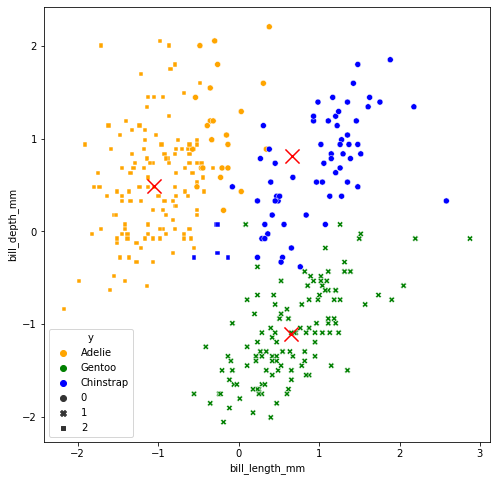

In [63]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df, hue=y,style=km.labels_, palette=["orange","green","blue"])

# Kümeleri göster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker='x',s=200,c='red')

## Silhoutte Skorları ile k-Means optimizasyonu

In [72]:
def s2(estimator, X):
    return silhouette_score(X, estimator.predict(X))

In [65]:
param = range(2,10)

In [66]:
km = KMeans(random_state=0, init='k-means++')

In [73]:
grid = GridSearchCV(km, {'n_clusters':param}, scoring=s2, cv=2)

In [74]:
grid.fit(df)

GridSearchCV(cv=2, estimator=KMeans(random_state=0),
             param_grid={'n_clusters': range(2, 10)},
             scoring=<function s2 at 0x000001F41CD0D550>)

In [75]:
# en iyi model
en_iyi_km=grid.best_estimator_

In [77]:
en_iyi_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

### doğru küme sayısı = 2

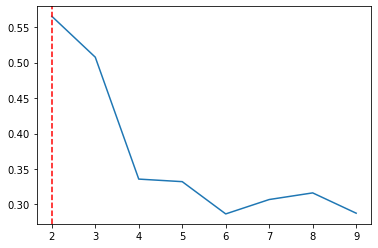

In [80]:
plt.plot(param,grid.cv_results_['mean_test_score'])
plt.axvline(x=en_iyi_km.n_clusters, color="red", ls="--")

### En iyi modelin gösterimi

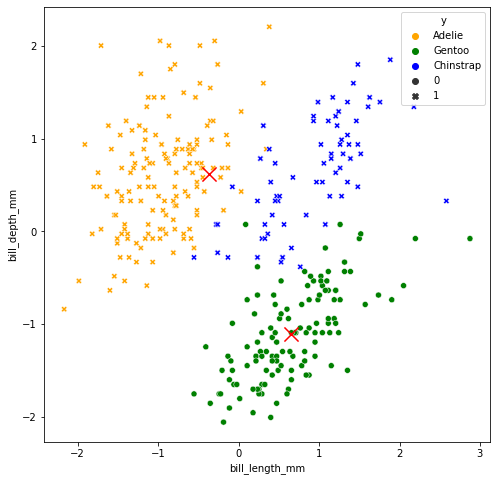

In [81]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df, hue=y,style=en_iyi_km.labels_, palette=["orange","green","blue"])
plt.scatter(en_iyi_km.cluster_centers_[:,0], en_iyi_km.cluster_centers_[:,1],marker='x',s=200,c='red')

# DBSCAN
### Density Based Spatial Clustering of Applications with Noise

In [82]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import DBSCAN                # For DBSCAN
import numpy as np                                # For various computations
from sklearn.preprocessing import StandardScaler  # For standardizing data    
from sklearn.neighbors import NearestNeighbors    # For nearest neighbors

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/penguins.csv')
y = df.y
df = df.drop('y',axis=1)
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [84]:
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020


### 1. Adım: Parametrelerin belirlenmesi
eps, min.numune (kümeye dahil olması için)

In [88]:
k = 7 # minimum ortak komşu sayısı

nn = NearestNeighbors(n_neighbors=k).fit(df)

In [93]:
# en yakın k komşunun mesafesinin hesapla
dist, ind = nn.kneighbors(df)

In [94]:
# mesafeleri sırala
dist = np.sort(dist, axis=0)[:,1]

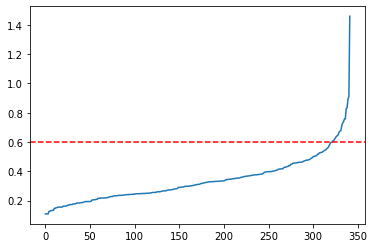

In [97]:
plt.plot(dist)
plt.axhline(y=.6, color='red', ls='--')

## eps = 0.6

In [101]:
# DBSCAN model fit
db = DBSCAN(eps=0.6, min_samples=7).fit(df)

In [102]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

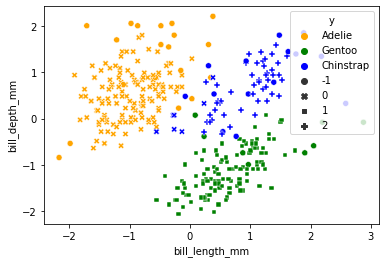

In [103]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue=y,style=db.labels_,palette=['orange','green','blue'])